In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd
import seaborn as sns

import tcri
import grimoire as grm

## Configuration

In [2]:
#any without signed mi were  false
disease            = "all"
subset             = "CD8"
signed_mi          = True
init_ortho         = True
entropy_threshold  = 2

adata_h5ad         = "/Users/nceglia/Data/tcri/yost.h5ad"
annotated_h5ad     = "/Users/nceglia/Data/tcri/yost_annotated.h5ad"


cd8 = ['CD8_act',
        'CD8_eff',
        'CD8_ex',
        'CD8_ex_act',
        'CD8_mem',
        'CD8_naive']
cd4 = ['Naive',
        'Tfh',
        'Th17',
        'Tregs']

## Read SCC data

In [3]:
adata = sc.read(adata_h5ad)
adata.X = csr_matrix(adata.X)

adata = grm.pp.remove_meaningless_genes(adata)

genes = [x for x in adata.var.index.tolist()]
genes = [x for x in genes if "TRAV" not in x]
genes = [x for x in genes if "TRAJ" not in x]
genes = [x for x in genes if "TRAD" not in x]

genes = [x for x in genes if "TRBV" not in x]
genes = [x for x in genes if "TRBJ" not in x]
genes = [x for x in genes if "TRBD" not in x]

genes = [x for x in genes if "TRGV" not in x]
genes = [x for x in genes if "TRGJ" not in x]
genes = [x for x in genes if "TRGD" not in x]

genes = [x for x in genes if "TRDV" not in x]
genes = [x for x in genes if "TRDJ" not in x]
genes = [x for x in genes if "TRDD" not in x]

adata = adata[:,genes]

tcri.pp.register_clonotype_key(adata,"trb")
adata = adata[adata.obs[adata.uns["tcri_clone_key"]]!="None"]
if subset == "CD8":
    adata = adata[adata.obs["cluster"].isin(cd8)]
else:
    adata = adata[adata.obs["cluster"].isin(cd4)]

tcri.pp.gene_entropy(adata)
adata = adata[:,adata.var["entropy"] > entropy_threshold]

#### NEW ####
gene_list = ["GZMB","GZMA","GZMK","CRTAM","IL7R","CX3CR1",
             "LEF1","SELL","PRF1","GNLY","TIGIT","TOX",
             "CTLA4","ENTPD1","ITGAE","CD3D","CD3G","CD4",
             "CD8A","CD8B","FOXP3","RTKN2","ZNF683","CXCR4",
             "KLRD1","KLRK1","NCAM1"]
t_nk_kir_genes = [
    # T cell marker genes
    'CD3E', 'CD3D', 'CD3G', 'CD4', 'CD8A', 'CD8B', 
    'FOXP3', 'TBX21', 'RORC', 'GATA3', 'IL2', 'IL2RA', 
    'IL7R', 'IL17A', 'IL17F', 'IL10', 'IL21', 'CTLA4', 
    'PDCD1', 'LAG3', 'HAVCR2', 'ICOS', 'TNFRSF18', 
    'TNFRSF4', 'CCR7', 'SELL', 'CD28', 'CD27', 'CD40LG', 
    'IFNG', 'GZMA', 'GZMB', 'GZMH', 'GZMK', 'GZMM', 
    'PRF1', 'FASLG', 'FAS', 'CCL3', 'CCL4', 'CCL5', 
    'XCL1', 'XCL2', 'CXCR3', 'CXCR6', 'CXCR4', 'CX3CR1', 
    'KLRG1', 'ZNF683', 'BCL2', 'BCL6', 'BLIMP1', 'PRDM1', 
    'TOX', 'EOMES', 'TIGIT', 'CD226', 'ITGA4', 'ITGAE', 
    'ITGAL', 'ITGB1', 'ITGB7', 'ITGB2', 'ICAM1', 'ICAM2', 
    'ICAM3', 'VCAM1', 'LFA1', 'CD69', 'CD44', 'CD62L', 
    'FOS', 'JUN', 'STAT1', 'STAT3', 'STAT4', 'STAT5A', 
    'STAT5B', 'STAT6', 'NFATC1', 'NFATC2', 'NFATC3', 
    'NFATC4', 'NFAT5', 'BATF', 'IRF4', 'IRF8', 'NFkB1', 
    'RELA', 'NFKB2', 'IKZF1', 'IKZF2', 'IKZF3', 'IKZF4', 
    'RBPJ', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4', 
    'MAPK1', 'MAPK3', 'MAPK8', 'MAPK14', 'FOSL1', 'FOSL2', 
    'JUND', 'JUNB', 'NR4A1', 'NR4A2', 'NR4A3', 'BACH2', 
    'HIF1A', 'HIF3A', 'HIF2A', 'MYC', 'CD38', 'ENTPD1', 
    'ADORA2A', 'CD25', 'CD127', 'CD122', 'CD132', 'CD45RA', 
    'CD45RO', 'CD11A', 'CD18', 'CD2', 'CD5', 'CD6', 
    'CD7', 'CD16', 'CD56', 'CD57', 'KLRG1', 'NCR1', 
    'NCR3', 'NKG2A', 'NKG2C', 'NKG2D', 'KIR2DL1', 'KIR2DL2', 
    'KIR2DL3', 'KIR2DL4', 'KIR2DS1', 'KIR2DS2', 'KIR2DS3', 
    'KIR2DS4', 'KIR2DS5', 'KIR3DL1', 'KIR3DL2', 'KIR3DL3', 
    'KIR3DS1', 'DUSP1', 'DUSP2', 'DUSP4', 'DUSP6', 'ZAP70', 
    'LCK', 'FYN', 'SRC', 'SYK', 'ITK', 'BTK', 'TEC', 
    'PIK3CA', 'PIK3CB', 'PIK3CD', 'PIK3CG', 'AKT1', 'AKT2', 
    'AKT3', 'MTOR', 'FOXO1', 'FOXO3', 'FOXO4', 'FOXO6', 
    'TSC1', 'TSC2', 'PTEN', 'SH2B3', 'GSK3A', 'GSK3B', 
    'CREBBP', 'EP300', 'KDM6B', 'SMARCA4', 'SMARCC1', 
    'SMARCC2', 'SMARCD1', 'SMARCD2', 'SMARCD3', 'SMARCE1', 
    'EZH2', 'SUZ12', 'EED', 'CBX2', 'CBX4', 'CBX6', 
    'CBX7', 'CBX8', 'H3F3A', 'H3F3B', 'HIST1H1A', 'HIST1H1B', 
    'HIST1H1C', 'HIST1H1D', 'HIST1H1E', 'HIST1H2AB', 
    'HIST1H2AC', 'HIST1H2AD', 'HIST1H2AE', 'HIST1H2AF', 
    'HIST1H2AG', 'HIST1H2AH', 'HIST1H2AI', 'HIST1H2AJ', 
    'HIST1H2AK', 'HIST1H2AL', 'HIST1H2AM', 'HIST1H2AN', 
    'HIST1H2AO', 'HIST1H2AP', 'HIST1H2AQ', 'HIST1H2AR', 
    'HIST1H2AS', 'HIST1H2AT', 'HIST1H2AU', 'HIST1H2AV', 
    'HIST1H2AW', 'HIST1H2AX', 'HIST1H2AY', 'HIST1H2AZ', 
    'HIST1H3A', 'HIST1H3B', 'HIST1H3C', 'HIST1H3D', 
    'HIST1H3E', 'HIST1H3F', 'HIST1H3G', 'HIST1H3H', 
    'HIST1H3I', 'HIST1H3J', 'HIST1H3K', 'HIST1H3L', 
    'HIST1H3M', 'HIST1H3N', 'HIST1H3O', 'HIST1H3P', 
    'HIST1H3Q', 'HIST1H3R', 'HIST1H3S', 'HIST1H3T', 
    'HIST1H3U', 'HIST1H3V', 'HIST1H3W', 'HIST1H3X', 
    'HIST1H3Y', 'HIST1H3Z', 'HIST1H4A', 'HIST1H4B', 
    'HIST1H4C', 'HIST1H4D', 'HIST1H4E', 'HIST1H4F', 
    'HIST1H4G', 'HIST1H4H', 'HIST1H4I', 'HIST1H4J', 
    'HIST1H4K', 'HIST1H4L', 'HIST1H4M', 'HIST1H4N', 
    'HIST1H4O', 'HIST1H4P', 'HIST1H4Q', 'HIST1H4R', 
    'HIST1H4S', 'HIST1H4T', 'HIST1H4U', 'HIST1H4V', 
    'HIST1H4W', 'HIST1H4X', 'HIST1H4Y', 'HIST1H4Z', 
    'B2M', 'HLA-A', 'HLA-B', 'HLA-C', 'HLA-DRA', 'HLA-DRB1', 
    'HLA-DQA1', 'HLA-DQB1', 'HLA-DPA1', 'HLA-DPB1'
]
gene_list = t_nk_kir_genes + gene_list
gene_list = list(set(gene_list).intersection(set(adata.var.index)))
tcri.pp.clone_size(adata)
adata = adata[adata.obs["clone_size"] > 5].copy()
len(set(adata.obs["trb"]))

100%|██████████| 15828/15828 [00:04<00:00, 3438.56it/s]


520

In [4]:
adata

AnnData object with n_obs × n_vars = 13614 × 163
    obs: 'cell.id', 'patient', 'treatment', 'cluster', 'UMAP1', 'UMAP2', 'trb', 'trb2', 'disease', 'response', 'clone_size'
    var: 'entropy'
    uns: 'cluster_colors', 'tcri_clone_key', 'tcri_unique_clonotypes'
    obsm: 'X_umap'

# Setup Model

In [5]:
model = tcri.ml.JointProbabilityDistribution(adata, gene_list, batch_size=1000)

Using device: cpu


In [6]:
model.train(num_epochs=50,print_every=1)

**** Epoch 0 	Loss: 34395.25977
**** Epoch 100 	Loss: 7656.60978
**** Epoch 200 	Loss: 5027.1923
**** Epoch 300 	Loss: 3797.17849
**** Epoch 400 	Loss: 3170.88426
**** Epoch 500 	Loss: 2685.87192
**** Epoch 600 	Loss: 2283.96462
**** Epoch 700 	Loss: 1943.70926
**** Epoch 800 	Loss: 1651.82834
**** Epoch 900 	Loss: 1401.72047
**** Epoch 1000 	Loss: 1190.09891
**** Epoch 1100 	Loss: 1014.713
**** Epoch 1200 	Loss: 871.67436
**** Epoch 1300 	Loss: 756.09171
**** Epoch 1400 	Loss: 663.15037
**** Epoch 1500 	Loss: 589.22553
**** Epoch 1600 	Loss: 531.19588
**** Epoch 1700 	Loss: 486.20748
**** Epoch 1800 	Loss: 451.69666
**** Epoch 1900 	Loss: 425.48208
**** Epoch 2000 	Loss: 405.55393
**** Epoch 2100 	Loss: 390.36639
**** Epoch 2200 	Loss: 378.67044
**** Epoch 2300 	Loss: 369.48953
**** Epoch 2400 	Loss: 362.1445
**** Epoch 2500 	Loss: 356.16258
**** Epoch 2600 	Loss: 351.23335
**** Epoch 2700 	Loss: 347.13945
**** Epoch 2800 	Loss: 343.73007
**** Epoch 2900 	Loss: 340.90292
**** Epoch 30

100%|██████████| 1045/1045 [00:00<00:00, 344796.07it/s]


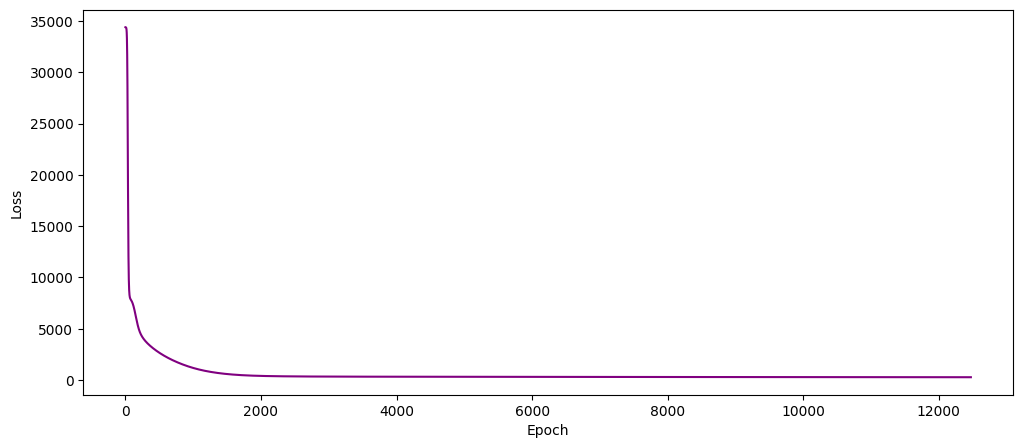

In [15]:
model.plot()

In [6]:
embed = GeneEmbedding(vector_file, dataset, vector="average")
cembed = CellEmbedding(dataset, embed)
adata = cembed.get_adata()
adata

Loading average of 1st and 2nd weights.


100%|██████████| 11670957/11670957 [00:18<00:00, 635611.94it/s]


Generating Cell Vectors.


100%|██████████| 22452/22452 [00:03<00:00, 5822.29it/s]


Found 0 Cells with No Counts.
Finished.
Loading embedding in X_genevector.
Running Scanpy neighbors and umap.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


AnnData object with n_obs × n_vars = 22452 × 1045
    obs: 'cell.id', 'patient', 'treatment', 'cluster', 'UMAP1', 'UMAP2', 'trb', 'trb2', 'disease', 'response'
    var: 'entropy'
    uns: 'cluster_colors', 'tcri_clone_key', 'tcri_unique_clonotypes', 'neighbors', 'umap'
    obsm: 'X_umap', 'X_genevector'
    obsp: 'distances', 'connectivities'

In [7]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

# Assign Phenotypes

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import tqdm
import scanpy as sc
import networkx as nx
from sklearn.metrics import confusion_matrix
from scipy.special import softmax
from scipy.spatial import distance
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.sparse import csr_matrix
import numpy as np
import operator
import collections
import os   
import pandas as pd
import gc
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import seaborn as sns

markers = dict()
markers["Naive/CM"] = ["SELL","LEF1","IL7R","TCF7"]
markers["Activated"] = ["GZMB"]
markers["Memory"] = ["GZMK"]
markers["Dsyfunctional"] = ["CXCL13","LAG3"]

def cell_distance(self, vec, norm=True):
    # matrix = self.matrix
    # if norm:
    #     vec /= np.linalg.norm(vec)
    #     print("norm")
    #     matrix = normalize(matrix)
    mapped_components = dict(zip(list(self.data.keys()),self.matrix))
    odists = []
    for x in tqdm.tqdm(self.adata.obs.index):
        cell_vec = mapped_components[x]
        # if norm:
        #     cell_vec /= np.linalg.norm(cell_vec)
        dist = 1. - distance.cosine(cell_vec, vec)
        odists.append(dist)
    return odists

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

from sklearn import preprocessing

def phenotype_probability(self, adata, phenotype_markers, return_distances=False, method="sparsemax", target_col="genevector", temperature=0.05, normalize=True):
    """
    Probablistically assign phenotypes based on a set of cell type labels and associated markers. 
    Can optionally return the original cosine distances and perform the assignment based on expression weight gene vectors.
    Loads into the anndata the pseudo-probabilities for each cell type and the deterministic label taken from the maximum probability over cell types.

    :param adata: anndata object generated from "get_adata", has "X_genevector" in the obsm dataframe.
    :type column: anndata.AnnData
    :param phenotype_markers: Dictionary of cell type labels (key) to gene markers used to define the cell type as a list (value).
    :type phenotype_markers: dict
    :param return_distances: Change the return type to a tuple that includes a dictionary containing the actual cosine distances alongside the phenotype probabilities.
    :type column: bool
    :param expression_weighted: Compute similarit to each cell using the expression weightedy marker gnene vector.
    :type column: bool
    :param target_col: Column label to load in deterministic cell asssignments in the obs data frame of the anndata object.
    :type target_col: bool
    :return: Anndata with cell type labels and probabilities, or optionally a tuple with the anndata and the raw cosine similarities.
    :rtype:  anndata.AnnData
    """
    if method == "softmax":
        print(bcolors.OKBLUE+"Using **SoftMax**"+bcolors.ENDC)
        pfunc = softmax
    elif method == "sparsemax":
        print(bcolors.OKBLUE+"Using **SparseMax**"+bcolors.ENDC)
        pfunc = self.entmax_15
    elif method == "normalized_exponential":
        print(bcolors.OKBLUE+"Using Normalized Exponential (Temp: {})".format(temperature)+bcolors.ENDC)
        pfunc = lambda x: self.normalized_exponential_vector(x, temperature)
    for x in adata.obs.columns:
        if "Pseudo-probability" in x:
            del adata.obs[x]
    mapped_components = dict(zip(list(self.data.keys()),self.matrix))
    genes = adata.var.index.to_list()
    cells = adata.obs.index.to_list()
    all_markers = []
    for _, markers in phenotype_markers.items():
        all_markers += markers  
    all_markers = list(set(all_markers))
    probs = dict()

    for pheno, markers in phenotype_markers.items():
        print(bcolors.OKBLUE+"Computing similarities for {}".format(pheno)+bcolors.ENDC)
        print(bcolors.OKGREEN+"Markers: {}".format(", ".join(markers))+bcolors.ENDC)
        vector = self.embed.generate_vector(markers)
        probs[pheno] = cell_distance(self, vector,norm=normalize)
    distribution = []
    celltypes = []
    for k, v in probs.items():
        distribution.append(v)
        celltypes.append(k)
    distribution = np.array(distribution)
    distribution = preprocessing.normalize(distribution)
    distribution = list(zip(*distribution))
    probabilities = []
    for d in distribution:
        p = pfunc(numpy.array(d))
        probabilities.append(p)
    
    res = {"distances":distribution, "order":celltypes, "probabilities":probabilities}
    barcode_to_label = dict(zip(list(self.data.keys()), res["probabilities"]))
    ct = []
    probs = collections.defaultdict(list)
    for x in adata.obs.index:
        ctx = res["order"][numpy.argmax(barcode_to_label[x])]
        ct.append(ctx)
        for ph, pb in zip(res["order"],barcode_to_label[x]):
            probs[ph].append(pb)
    adata.obs[target_col] = ct
    def load_predictions(adata,probs):
        prob_cols = []
        for ph in probs.keys():
            prob_cols.append(ph+" Pseudo-probability")
            adata.obs[ph+" Pseudo-probability"] = probs[ph]
        adata.uns["probability_columns"] = prob_cols
        return adata
    adata = load_predictions(adata, probs)
    if return_distances:
        return adata, res
    else:
        return adata

adata, dist = phenotype_probability(cembed, adata, markers, method="normalized_exponential", temperature=0.00005, return_distances=True, normalize=True)

Using Normalized Exponential (Temp: 5e-05)
Computing similarities for Naive/CM
Markers: SELL, LEF1, IL7R, TCF7


100%|██████████| 22452/22452 [00:00<00:00, 70050.41it/s]


Computing similarities for Activated
Markers: GZMB


100%|██████████| 22452/22452 [00:00<00:00, 71271.65it/s]


Computing similarities for Memory
Markers: GZMK


100%|██████████| 22452/22452 [00:00<00:00, 71910.37it/s]


Computing similarities for Dsyfunctional
Markers: CXCL13, LAG3


100%|██████████| 22452/22452 [00:00<00:00, 72544.94it/s]


<Axes: xlabel='genevector', ylabel='count'>

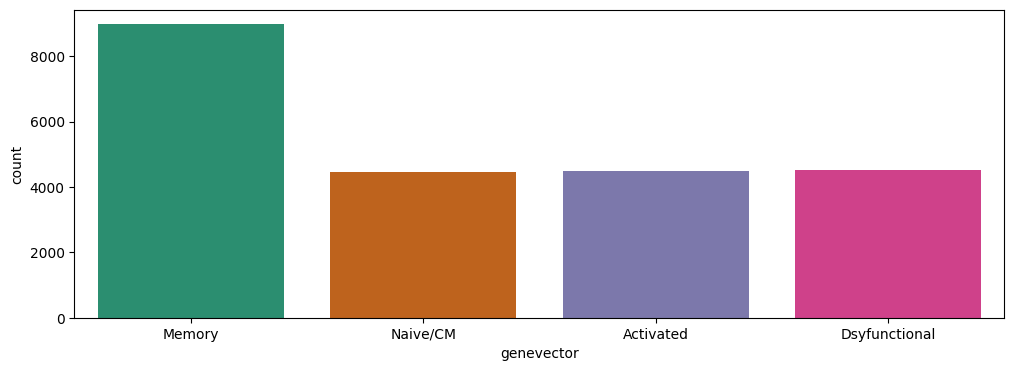

In [9]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
sns.countplot(data=adata.obs, x="genevector",ax=ax)

<Axes: xlabel='genevector', ylabel='cluster'>

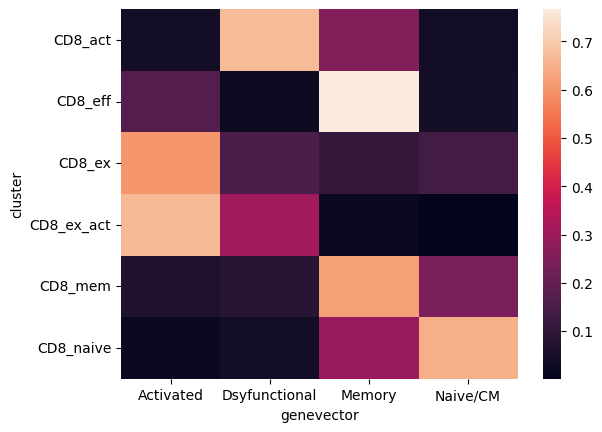

In [10]:
cembed.compare_classification(adata,"cluster","genevector")

In [11]:
response = []
for x in adata.obs["response"]:
    if "yes" in x.lower():
        response.append("Yes")
    else:
        response.append("No")
adata.obs["response"] = response

ct = []
for x,y in zip(adata.obs['response'], adata.obs['treatment']):
    ct.append("{}_{}".format(x,y))
adata.obs["response_treatment"] = ct

ct = []
for x,y in zip(adata.obs['response_treatment'],adata.obs['disease']):
    ct.append("{}_{}".format(x,y))
adata.obs["rdt"] = ct

ct = []
for x,y in zip(adata.obs['response'],adata.obs['disease']):
    ct.append("{}_{}".format(x,y))
adata.obs["response_disease"] = ct

i = 0
main_color_map = dict()
adata = adata.copy()
colors = tcri.pl.tcri_colors.copy() + tcri.pl.tcri_colors.copy()
for x in ["genevector", "treatment", "response","patient","response_disease","response_treatment"]:
    ct = []
    for i, val in enumerate(set(adata.obs[x].tolist())):
        c = colors.pop(i)
        ct.append(c)
        main_color_map[val] = c
    adata.uns["{}_colors".format(x)] = ct

In [137]:
import grimoire as grm
grm.pp.run_harmony_workflow(adata,batch_key="patient")

2024-04-22 13:46:26,996 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-04-22 13:46:36,789 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-04-22 13:46:36,868 - harmonypy - INFO - Iteration 1 of 10
2024-04-22 13:46:44,977 - harmonypy - INFO - Iteration 2 of 10
2024-04-22 13:46:53,782 - harmonypy - INFO - Converged after 2 iterations


AnnData object with n_obs × n_vars = 22452 × 1045
    obs: 'cell.id', 'patient', 'treatment', 'cluster', 'UMAP1', 'UMAP2', 'trb', 'trb2', 'disease', 'response', 'clone_size', 'log(Clone Size)', 'genevector', 'response_treatment', 'rdt', 'response_disease', 'Naive Module Score', 'Activated Module Score', 'Memory Module Score', 'Dsyfunctional Module Score', 'Naive Pseudo-probability', 'Activated Pseudo-probability', 'Memory Pseudo-probability', 'Dsyfunctional Pseudo-probability'
    var: 'entropy'
    uns: 'cluster_colors', 'tcri_clone_key', 'tcri_unique_clonotypes', 'neighbors', 'umap', 'log1p', 'probability_columns', 'genevector_colors', 'treatment_colors', 'response_colors', 'patient_colors', 'response_disease_colors', 'response_treatment_colors', 'tcri_unique_phenotypes', 'tcri_phenotype_key', 'pca'
    obsm: 'X_umap', 'X_genevector', 'X_pca', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

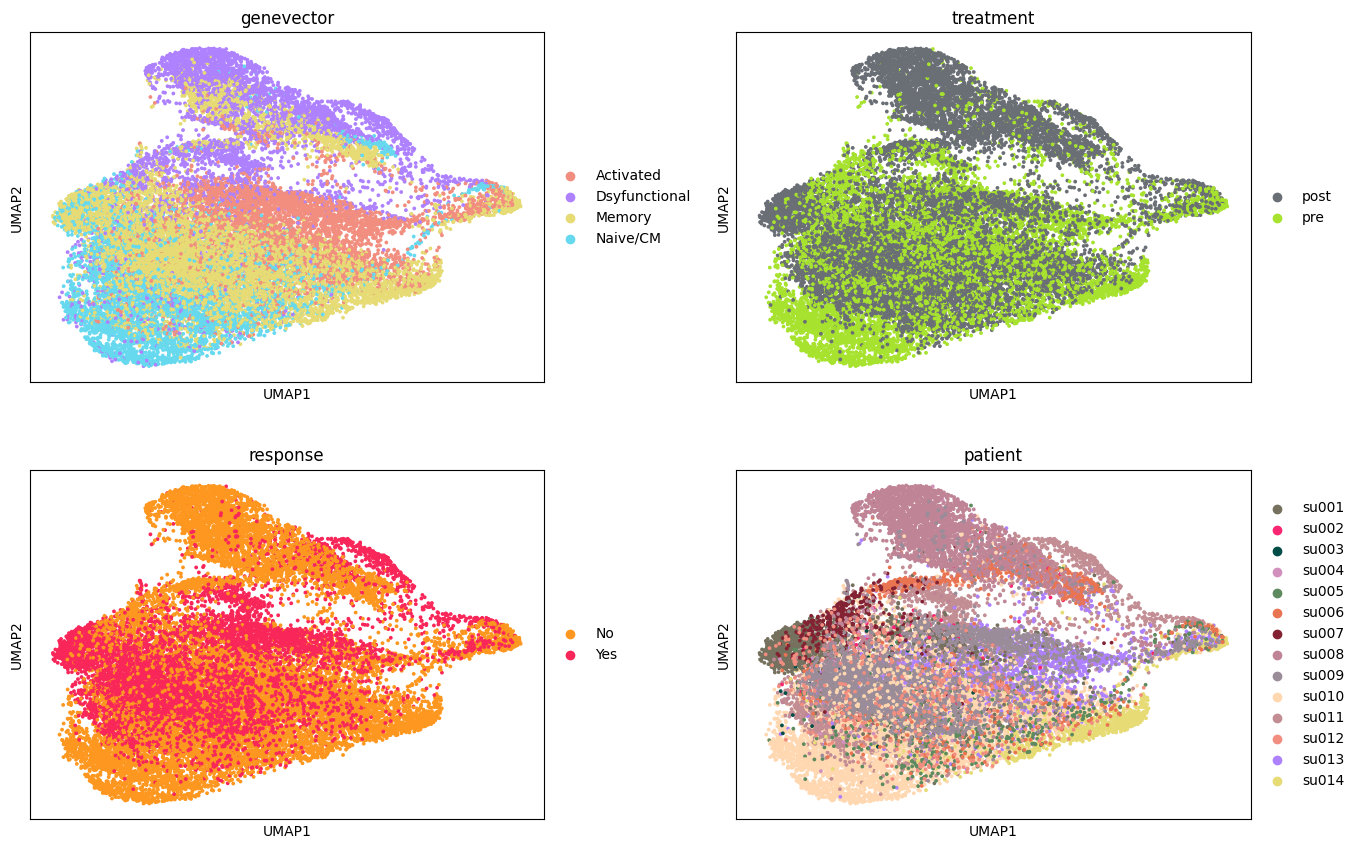

In [12]:
sc.pl.umap(adata,color=["genevector", "treatment", "response", "patient"],s=30,wspace=0.25, ncols=2, save="yostmain.pdf")
!cp figures/umapyostmain.pdf /Users/ceglian/Data/tcri/

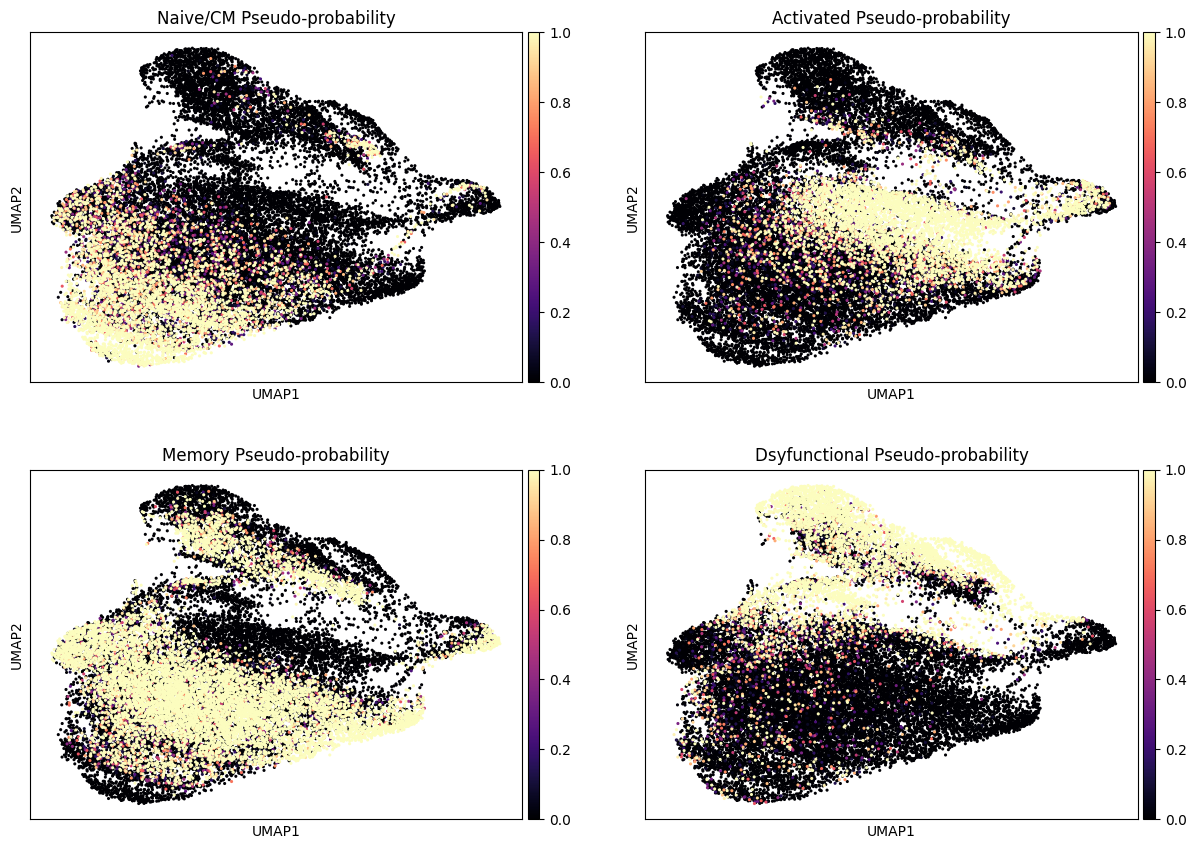

In [13]:
sc.pl.umap(adata,color=adata.uns["probability_columns"],s=20, cmap="magma",ncols=2, save="yost.pdf")
!cp figures/umapyost.pdf /Users/ceglian/

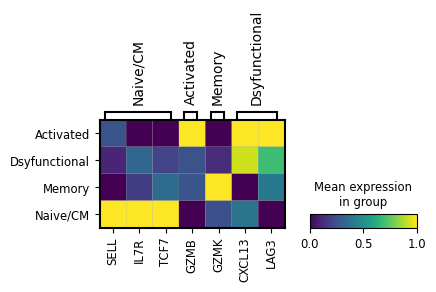

In [14]:
markers["Naive/CM"].remove("LEF1")
sc.pl.matrixplot(adata,markers,groupby="genevector",standard_scale="var",save="markers.pdf")
!cp figures/matrixplot_markers.pdf /Users/ceglian/Data/tcri/

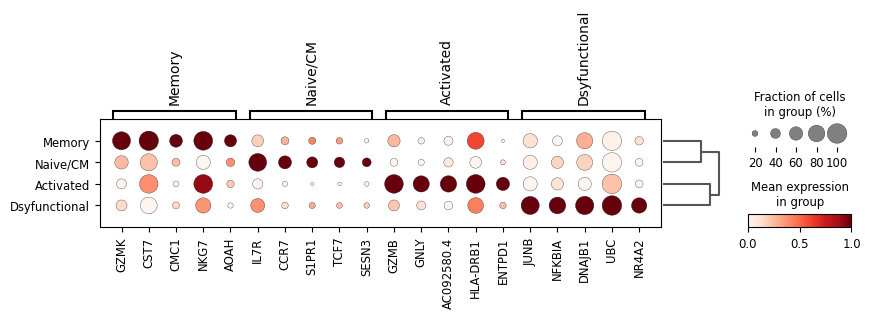

In [260]:
sc.tl.rank_genes_groups(adata,"genevector")
sc.tl.dendrogram(adata,"genevector")
sc.pl.rank_genes_groups_dotplot(adata,min_logfoldchange=1.,standard_scale='var',n_genes=5, save="")

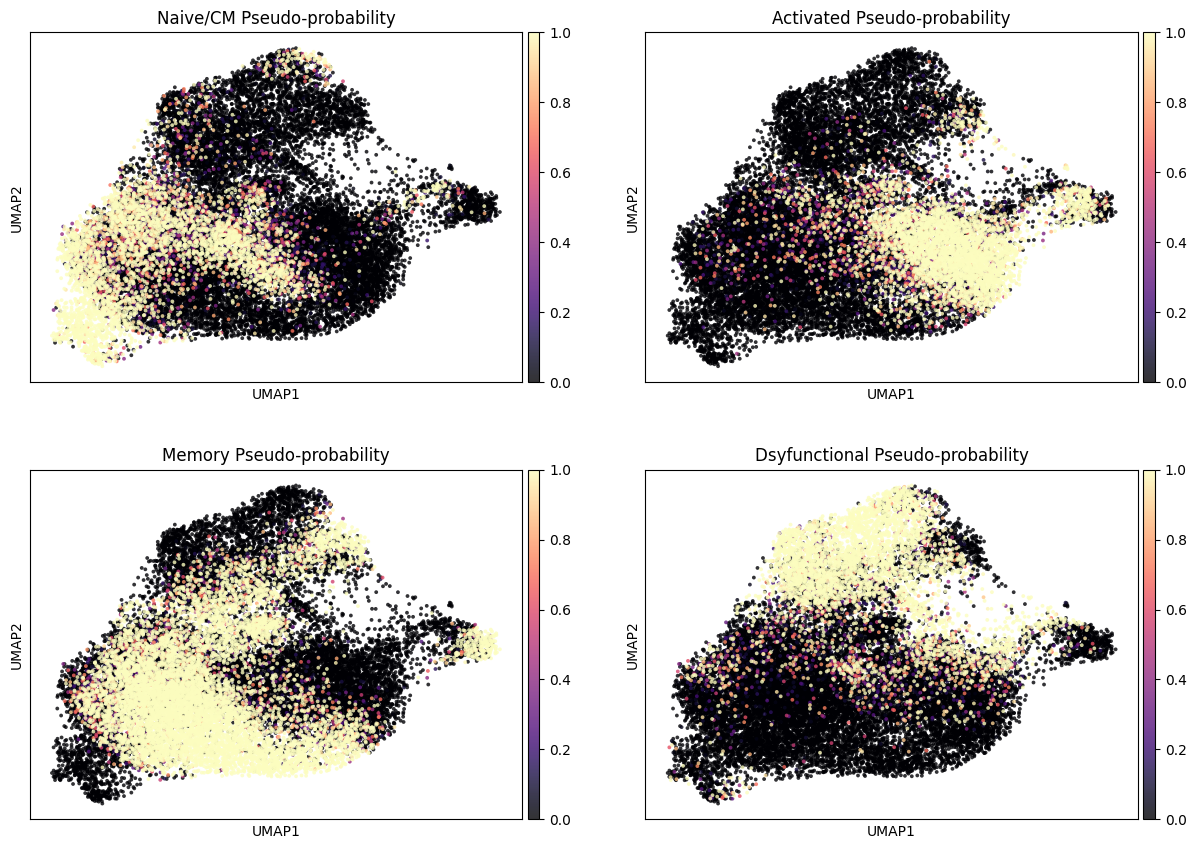

In [270]:
cembed.plot_probabilities(adata)
!cp figures/umapprobs.pdf /Users/ceglian/Data/tcri/

# TCRi Setup

In [15]:
tcri.pp.register_phenotype_key(adata,"genevector")
tcri.pp.register_clonotype_key(adata,"trb")

In [16]:
tcri.pp.clone_size(adata)

In [17]:
adata.obs["response"]

cell.id
scc.su010.pre.rep1_AAACGGGAGGACAGAA       No
scc.su010.pre.rep1_AAACGGGGTAGTACCT       No
scc.su010.pre.rep1_AAACGGGGTGATAAAC       No
scc.su010.pre.rep1_AAACGGGTCAAAGTAG       No
scc.su010.pre.rep1_AAAGATGAGTGGCACA       No
                                        ... 
bcc.su012.post.tcell_TGACAACTCTCGGACG    Yes
bcc.su012.post.tcell_TGCCAAAGTAGCGTGA    Yes
bcc.su012.post.tcell_TGTGTTTGTAGATTAG    Yes
bcc.su012.post.tcell_TTCGAAGTCGTTACAG    Yes
bcc.su012.post.tcell_TTCTCCTGTGGCGAAT    Yes
Name: response, Length: 22452, dtype: category
Categories (2, object): ['No', 'Yes']

# T Cell Clones

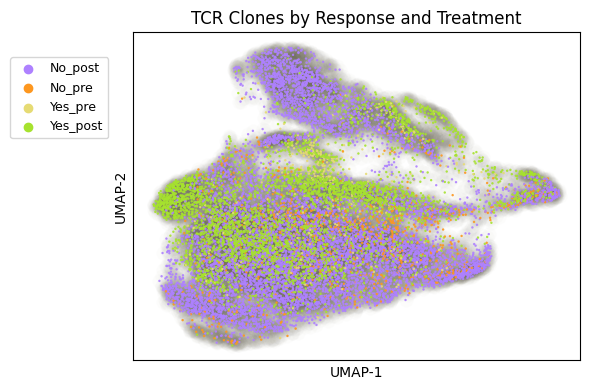

In [18]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import matplotlib.patches as mpatches

from gseapy import dotplot
import tqdm

import collections
import operator
import itertools

from tcri.pl import tcri_colors

def top_clone_umap(adata, reduction="umap", top_n=10, fg_alpha=0.9, fg_size=25, bg_size=0.1, bg_alpha=0.6, figsize=(12,5), return_df=False,save=None):
    df = adata.obs
    seq_column = adata.uns["tcri_clone_key"]
    plt.figure(figsize = figsize)
    clonotype_counts = collections.defaultdict(int)
    response_dict = dict()
    for clonotype,r in zip(df[seq_column],df["response_treatment"]):
        clonotype_counts[clonotype] += 1
        response_dict[clonotype] = r
    top_clonotypes = sorted(clonotype_counts.items(), key=operator.itemgetter(1),reverse=True)
    top_clonotypes = [x[0] for x in top_clonotypes[:top_n]]
    ax1 = plt.subplot(1,1,1)
    x = [x[0] for x in adata.obsm["X_{}".format(reduction)]]
    y = [x[1] for x in adata.obsm["X_{}".format(reduction)]]
    sns.scatterplot(x=x,y=y, color="#75715E",  alpha=bg_alpha, ax=ax1, s=bg_size, linewidth=0.0)
    xonly = []
    yonly = []
    clonotype_labels = []
    size = []
    for clonotype,x1,y1 in zip(df[seq_column],x,y):
        clonotype = str(clonotype)
        if clonotype not in top_clonotypes or clonotype == "None" or clonotype == "nan":
            continue
        else:
            xonly.append(x1)
            yonly.append(y1)
            size.append(1/clonotype_counts[clonotype])
            clonotype_labels.append(response_dict[clonotype])         #str(clonotype) + " {}".format(clonotype_counts[clonotype]))
    dftop = pd.DataFrame.from_dict({"TCR Sequence":clonotype_labels,"Cells":size, "UMAP1":xonly,"UMAP2":yonly})
    colors = tcri_colors[2:] + tcri_colors + tcri_colors
    order = []
    for c in set(clonotype_labels):
        if c != "_Other":
            order.append(c)
    colors = colors[:len(set(clonotype_labels))]
    sns.scatterplot(data=dftop, x="UMAP1", y="UMAP2", hue="TCR Sequence", hue_order=order, ax=ax1, alpha=fg_alpha,s=fg_size, linewidth=0.0,palette=colors)
    ax1.set_xlabel('UMAP-1')
    ax1.set_ylabel('UMAP-2')
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    ax1.xaxis.set_ticks([])
    ax1.yaxis.set_ticks([])
    ax1.set_title("TCR Clones by Response and Treatment")
    h,l = ax1.get_legend_handles_labels()
    ax1.legend(h[:top_n-1], l[:top_n-1], borderaxespad=2.,fontsize='9',bbox_to_anchor=(0, 1), loc='best')
    plt.tight_layout()
    if return_df:
        return dftop
    elif save != None:
        plt.savefig(save)
top_clone_umap(adata, top_n=1000, fg_size=3, figsize=(6,4),bg_size=100, bg_alpha=0.02, save="/Users/ceglian/yost_clones.pdf")

In [237]:
for x in adata.uns["probability_columns"]:
    adata.obs[x] = np.nan_to_num(adata.obs[x])

# T Cell Phenotypic Trajectory

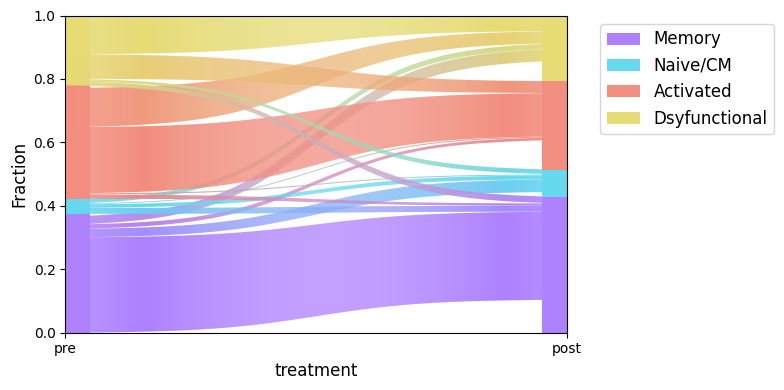

In [35]:
responder = adata[adata.obs["response"] == "Yes"]
# responder = responder[responder.obs["disease"] == "bcc"]
responder = responder[responder.obs["clone_size"] > 10]
tcri.pp.joint_distribution(responder)
tcri.pl.phenotypic_flux(responder,splitby="treatment",order=["pre","post"], nt=False,normalize=True, 
                        figsize=(8,4),save="/Users/ceglian/bcc_responders.pdf",phenotype_colors=main_color_map)

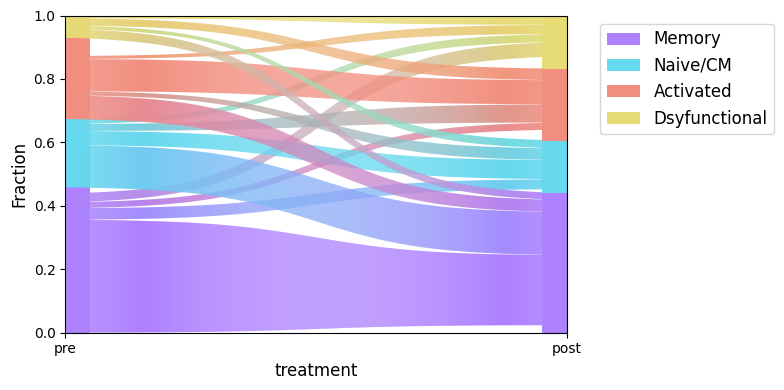

In [36]:
responder = adata[adata.obs["response"] == "No"]
# responder = responder[responder.obs["disease"] == "scc"]
responder = responder[responder.obs["clone_size"] > 10]
tcri.pp.joint_distribution(responder)
tcri.pl.phenotypic_flux(responder,splitby="treatment",order=["pre","post"], nt=False,normalize=True, figsize=(8,4),save="/Users/ceglian/scc_responders.pdf",phenotype_colors=main_color_map)

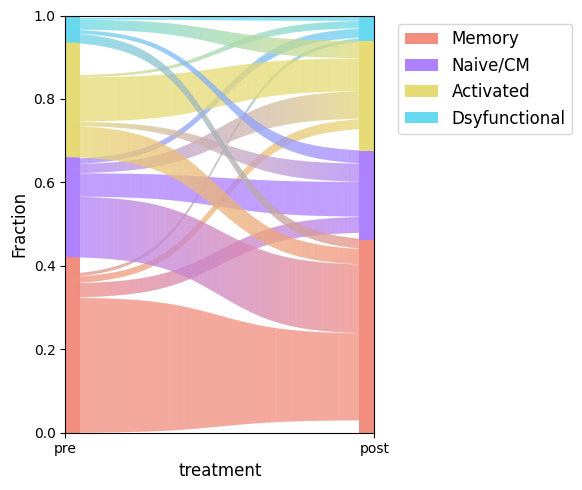

In [97]:
responder = adata[adata.obs["response"] == "No"]
responder = responder[responder.obs["disease"] == "scc"]
responder = responder[responder.obs["clone_size"] > 5]
tcri.pp.joint_distribution(responder)
tcri.pl.phenotypic_flux(responder,splitby="treatment",order=["pre","post"], nt=False,normalize=True,figsize=(6,5),save="/Users/ceglian/scc_nresponders.pdf",phenotype_colors=main_color_map)

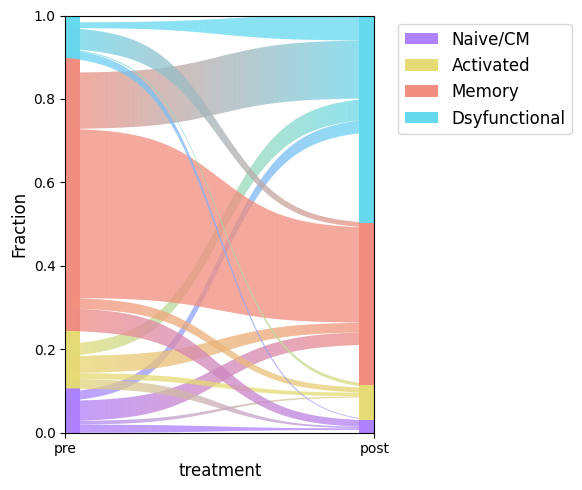

In [100]:
responder = adata[adata.obs["response"] == "No"]
responder = responder[responder.obs["disease"] == "bcc"]
responder = responder[responder.obs["clone_size"] > 5]
tcri.pp.joint_distribution(responder)
tcri.pl.phenotypic_flux(responder,splitby="treatment",order=["pre","post"], nt=False,normalize=True, figsize=(6,5),save="/Users/ceglian/bcc_nresponders.pdf",phenotype_colors=main_color_map)

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import matplotlib.patches as mpatches
from statannotations.Annotator import Annotator
from tcri.pl import tcri_colors

from gseapy import dotplot
import tqdm

import collections
import operator
import itertools

from tcri.utils import Phenotypes, CellRepertoire, Tcell, plot_pheno_sankey, plot_pheno_ternary_change_plots, draw_clone_bars, probabilities
from tcri.preprocessing import clone_size, joint_distribution
from tcri.metrics import clonotypic_entropies as centropies
from tcri.metrics  import phenotypic_entropies as pentropies
from tcri.metrics  import clonality as clonality_tl
from tcri.metrics  import flux as flux_tl
from tcri.metrics  import probability_distribution as pdistribution
from tcri.metrics  import mutual_information as mutual_information_tl
from tcri.metrics  import phenotypic_entropy_delta as phenotypic_entropy_delta_tl
from tcri.metrics  import clone_fraction as clone_fraction_tl


def tcri_boxplot(adata, function, groupby=None,ylabel="", splitby=None,figsize=(8,4),s=20,order=None, hue_order=None, palette=None, add_stats=True):
    if palette == None:
        palette = tcri_colors
    if groupby == None and splitby == None:
        data = function(adata)
        df = pd.DataFrame(list(data.items()), columns=['Phenotype', 'Clonotypic Entropy'])
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        fig,ax=plt.subplots(1,1,figsize=figsize)
        sns.stripplot(data=df,x="Phenotype",y=ylabel,s=s,ax=ax, palette=palette)
        ax.set_ylim(0,max(df[ylabel] + 0.1))
        ax.set_ylabel(ylabel)
        ax.set_title(ylabel)
        fig.tight_layout()
    elif groupby != None and splitby == None:
        groups = adata.obs[groupby].unique()
        dfs = []
        for group in groups:
            data = function(adata[adata.obs[groupby]==group])
            df = pd.DataFrame(list(data.items()), columns=['Phenotype',ylabel])
            df[groupby] = group
            dfs.append(df)
        df = pd.concat(dfs)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        if order == None:
            order = df.groupby(["Phenotype"]).median(ylabel).sort_values(ylabel).index.tolist()
        fig,ax=plt.subplots(1,1,figsize=figsize)
        sns.stripplot(data=df,x="Phenotype",y=ylabel,s=s,hue=groupby,ax=ax,order=order, palette=palette)
        sns.boxplot(data=df,x="Phenotype",y=ylabel,ax=ax, color="#999999",order=order)

        annotator = Annotator(ax, pairs=[("Thur", "Fri"), ("Fri", "Sat"), ("Sat", "Sun")], data=df, x="day", y="total_bill")
        annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()


        ax.set_ylim(0,max(df[ylabel] + 0.1))
        ax.set_title(ylabel)
        ax.set_ylabel(ylabel)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        fig.tight_layout()
    elif groupby != None and splitby != None:
        groups = adata.obs[groupby].unique()
        dfs = []
        for group in groups:
            sub = adata[adata.obs[groupby]==group]
            splits = sub.obs[splitby].unique()
            for split in splits:
                data = function(sub[sub.obs[splitby]==split])
                df = pd.DataFrame(list(data.items()), columns=['Phenotype', ylabel])
                df[groupby] = group
                df[splitby] = split
                dfs.append(df)
        df = pd.concat(dfs)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(inplace=True)
        fig,ax=plt.subplots(1,1,figsize=figsize)
        if order == None:
            order = df.groupby(["Phenotype"]).median(ylabel).sort_values(ylabel).index.tolist()
        if hue_order == None:
            hue_order = list(sorted(set(df[splitby])))
        print(order)
        if add_stats:
            pairs = []
            hpairs = list(itertools.combinations(hue_order, 2))
            for x in order:
                print(x)
                for z,w in hpairs:
                    pairs.append(((x,z),(x,w)))
                print(pairs)
        print(pairs)
        sns.boxplot(data=df,
                    x="Phenotype",
                    y=ylabel,
                    ax=ax, 
                    hue=splitby,
                    order=order,
                    hue_order=hue_order,
                    palette=palette)
        annotator = Annotator(ax, pairs=pairs, data=df, x="Phenotype", y=ylabel, hue=splitby,order=order, hue_order=hue_order)
        annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
        ax.set_ylim(0,max(df[ylabel] + 0.1))
        ax.set_title(ylabel)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_ylabel(ylabel)
        fig.tight_layout()
    else:
        raise ValueError("'groupby' must be set to use 'splitby'.")
    return ax

def clonality(adata, groupby = None, splitby=None, s=10, order=None, figsize=(12,5), palette=None):
    return tcri_boxplot(adata,clonality_tl, ylabel="Clonality", groupby=groupby, splitby=splitby, s=s, figsize=figsize, order=order, palette=palette)

def clonotypic_entropy(adata, method="probabilistic", normalized=True, groupby=None, splitby=None, s=10, figsize=(12,5), order=None, palette=None):
    func = lambda x : centropies(x, normalized=normalized, method=method)
    return tcri_boxplot(adata, func, groupby=groupby, ylabel="Clonotypic Entropy", splitby=splitby, s=s, figsize=figsize, order=order, palette=palette)

In [154]:
len(set(adata.obs.index))

22452

# Clonality and Clonotypic Entropy

['Naive/CM', 'Dsyfunctional', 'Activated', 'Memory']
Naive/CM
[(('Naive/CM', 'No_post'), ('Naive/CM', 'No_pre')), (('Naive/CM', 'No_post'), ('Naive/CM', 'Yes_post')), (('Naive/CM', 'No_post'), ('Naive/CM', 'Yes_pre')), (('Naive/CM', 'No_pre'), ('Naive/CM', 'Yes_post')), (('Naive/CM', 'No_pre'), ('Naive/CM', 'Yes_pre')), (('Naive/CM', 'Yes_post'), ('Naive/CM', 'Yes_pre'))]
Dsyfunctional
[(('Naive/CM', 'No_post'), ('Naive/CM', 'No_pre')), (('Naive/CM', 'No_post'), ('Naive/CM', 'Yes_post')), (('Naive/CM', 'No_post'), ('Naive/CM', 'Yes_pre')), (('Naive/CM', 'No_pre'), ('Naive/CM', 'Yes_post')), (('Naive/CM', 'No_pre'), ('Naive/CM', 'Yes_pre')), (('Naive/CM', 'Yes_post'), ('Naive/CM', 'Yes_pre')), (('Dsyfunctional', 'No_post'), ('Dsyfunctional', 'No_pre')), (('Dsyfunctional', 'No_post'), ('Dsyfunctional', 'Yes_post')), (('Dsyfunctional', 'No_post'), ('Dsyfunctional', 'Yes_pre')), (('Dsyfunctional', 'No_pre'), ('Dsyfunctional', 'Yes_post')), (('Dsyfunctional', 'No_pre'), ('Dsyfunctional', 'Y

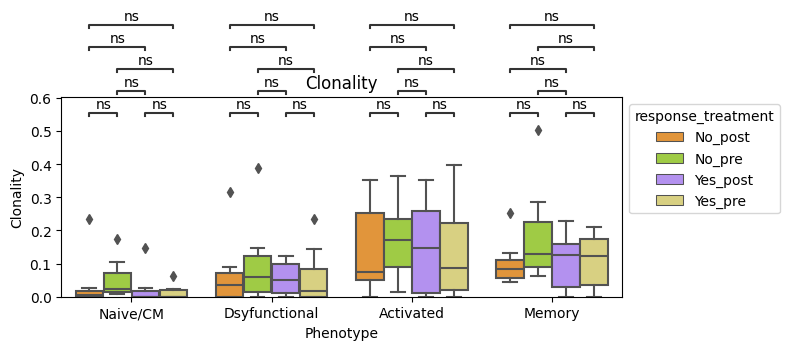

In [152]:
clonality(adata, groupby="patient",splitby="response_treatment", figsize=(8,4), palette=main_color_map)
plt.savefig("/Users/ceglian/yost_clonality.pdf")

['Activated', 'Dsyfunctional', 'Naive/CM', 'Memory']
Activated
[(('Activated', 'No_post'), ('Activated', 'No_pre')), (('Activated', 'No_post'), ('Activated', 'Yes_post')), (('Activated', 'No_post'), ('Activated', 'Yes_pre')), (('Activated', 'No_pre'), ('Activated', 'Yes_post')), (('Activated', 'No_pre'), ('Activated', 'Yes_pre')), (('Activated', 'Yes_post'), ('Activated', 'Yes_pre'))]
Dsyfunctional
[(('Activated', 'No_post'), ('Activated', 'No_pre')), (('Activated', 'No_post'), ('Activated', 'Yes_post')), (('Activated', 'No_post'), ('Activated', 'Yes_pre')), (('Activated', 'No_pre'), ('Activated', 'Yes_post')), (('Activated', 'No_pre'), ('Activated', 'Yes_pre')), (('Activated', 'Yes_post'), ('Activated', 'Yes_pre')), (('Dsyfunctional', 'No_post'), ('Dsyfunctional', 'No_pre')), (('Dsyfunctional', 'No_post'), ('Dsyfunctional', 'Yes_post')), (('Dsyfunctional', 'No_post'), ('Dsyfunctional', 'Yes_pre')), (('Dsyfunctional', 'No_pre'), ('Dsyfunctional', 'Yes_post')), (('Dsyfunctional', 'No_pr

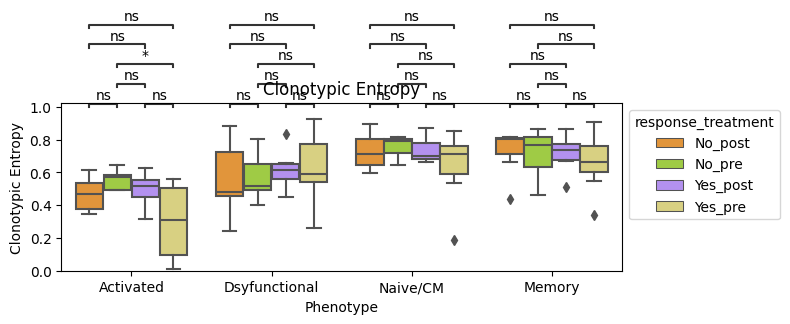

In [150]:
clonotypic_entropy(adata,groupby="patient",figsize=(8,4),method="probabilistic",splitby="response_treatment",normalized=True,palette=main_color_map)
plt.savefig("/Users/ceglian/yost_cent.pdf")

# Phenotypic Flux 

100%|██████████| 4/4 [02:30<00:00, 37.60s/it]

['#6A6E75', '#F28E7F', '#6A6E75', '#F28E7F']


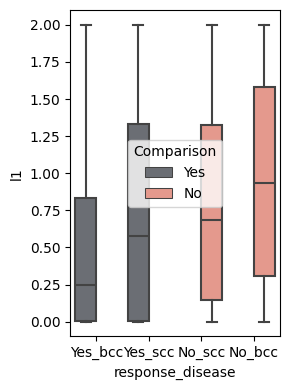

In [41]:
tcri.pl.flux(adata, key="treatment", order=["pre","post"], groupby="response_disease", method="probabilistic", distance_metric="l1",paint="response",figsize=(3,4))
plt.savefig("/Users/ceglian/l1.pdf")

In [60]:
tcri.pl.flux(adata, key="treatment", order=["pre","post"], groupby="response_disease", method="probabilistic", distance_metric="dkl",paint="response",figsize=(3,4))
plt.savefig("/Users/ceglian/dkl.pdf")

 50%|█████     | 2/4 [01:18<01:18, 39.46s/it]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/Users/ceglian/miniforge3/envs/scrna/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/38/rslqw81d2rx5jfmt2pc_dmnhd336fz/T/ipykernel_91293/4105653285.py", line 1, in <module>
    tcri.pl.flux(adata, key="treatment", order=["pre","post"], groupby="response_disease", method="probabilistic", distance_metric="dkl",paint="response",figsize=(3,4))
  File "/Users/ceglian/GitHub/tcri/tcri/plotting/_plotting.py", line 545, in flux
    l1_distances = flux_tl(sdata,key=key,from_this=order[i],to_that=order[i+1],distance_metric=distance_metric)
  File "/Users/ceglian/GitHub/tcri/tcri/metrics/_metrics.py", line 149, in flux
    this_distribution = marginal_phenotypic(this,clones=[clone], probability=True)
  File "/Users/ceglian/GitHub/tcri/tcri/metrics/_metrics.py", line 130, in marginal_phenotypic
    joint_distribution(adata,method=method)
  Fil

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import tqdm

from tcri.tl import flux as flux_tl
from tcri.pl import tcri_colors


def flux(adata, key, groupby, order, paint_dict=None, method="probabilistic", paint=None, distance_metric="l1", figsize=(12,5), palette=None):
    dfs = []
    if paint != None:
        palette = []
        legend_handles = [] 
        paint_categories = adata.obs[paint].unique()
        if paint_dict != None:
            pcolors = paint_dict
        else:
            pcolors = dict(zip(paint_categories, tcri_colors))
        for category in paint_categories:
            print(category,pcolors[category])
            handle = mpatches.Patch(color=pcolors[category], label=category)
            legend_handles.append(handle)
    else:
        if palette == None:
            if "{}_colors".format(paint) in adata.uns:
                palette = adata.uns["{}_colors".format(paint)]
            else:
                palette = tcri.pl.tcri_colors
    for x in tqdm.tqdm(list(set(adata.obs[groupby]))):
        sdata = adata[adata.obs[groupby]==x]
        hue_order = []
        for i in range(len(order)-1):
            l1_distances = flux_tl(sdata,key=key,from_this=order[i],to_that=order[i+1],distance_metric=distance_metric)
            df = pd.DataFrame(list(l1_distances.items()), columns=['Clone', distance_metric])
            df[groupby] = x
            if paint!=None:
                pcat = sdata.obs[paint].unique().tolist()[0]
                palette.append(pcolors[pcat])
            df["Comparison"] = pcat
            dfs.append(df)
    print(palette)
    df = pd.concat(dfs)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    order = df.groupby(groupby).median(distance_metric).sort_values(distance_metric).index.tolist()
    fig,ax=plt.subplots(1,1,figsize=figsize)
    sns.boxplot(data=df,x=groupby,y=distance_metric,hue="Comparison",palette=pcolors,ax=ax,dodge=False,order=order)
    pairs = list(itertools.combinations(set(df["Comparison"]),2))
    print(df)
    annotator = Annotator(ax, pairs=pairs, data=df, x=groupby, y=distance_metric,order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
    fig.tight_layout()
    return ax

# # smaller = adata.copy()
# # sc.pp.subsample(smaller, fraction=0.2)
# sdata = adata[adata.obs["clone_size"] > 1]
# flux(sdata, key="treatment", order=["pre","post"], groupby="response_disease", paint_dict=main_color_map, method="probabilistic", distance_metric="l1",paint="response",figsize=(7,5))
# plt.savefig("/Users/ceglian/flux_dkl.pdf")

In [1]:
from tcri.tl import phenotypic_entropies as pentropies
from tcri.pl import tcri_colors
from tcri.pp import clone_Size
def phenotypic_entropy(adata, groupby, splitby, method="probabilistic", return_df=False, normalized=True, decimals=5, figsize=(5,4), save=None, order=None, rotation=0, minimum_clone_size=1, palette=None):
    ps = []
    rs = []
    r2 = []
    ts = []
    for r in set(adata.obs[groupby]):
        rdata = adata[adata.obs[groupby] == r]
        clone_size(rdata)
        rdata = rdata[rdata.obs["clone_size"] >= minimum_clone_size]
        for p in set(rdata.obs[splitby]):
            pdata = rdata[rdata.obs[splitby] == p]
            for clone, ent in pentropies(pdata,method=method,normalized=normalized,decimals=decimals).items():
                rs.append(p)
                r2.append(ent)
                ts.append(clone)
                ps.append(r)
    df = pd.DataFrame.from_dict({groupby:ps,splitby:rs,"Phenotypic Entropy":r2,"Clone":ts})
    fig, ax = plt.subplots(1,1,figsize=figsize)
    if order == None:
        order = list(set(rs))
    if palette == None:
        palette = tcri_colors
    sns.boxplot(data=df, x=splitby,y="Phenotypic Entropy",ax=ax,order=order,palette=palette)
    pairs = list(itertools.combinations(set(df[splitby]),2))
    print(pairs)
    annotator = Annotator(ax, pairs=pairs, data=df, x=splitby, y="Phenotypic Entropy",order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
    plt.xticks(rotation=rotation)
    if save!=None:
        fig.savefig(save)
    if return_df:
        return df
tcri.pp.clone_size(adata)
xdata = adata[adata.obs["clone_size"] > 1]
tcri.pp.joint_distribution(xdata)

main_color_map["Yes_post"] = tcri_colors[2]
main_color_map["No_post"] = tcri_colors[3]
main_color_map["Yes_pre"] = tcri_colors[4]
main_color_map["No_pre"] = tcri_colors[5]

df = phenotypic_entropy(xdata,groupby="patient",splitby="response_treatment",order=["Yes_pre","Yes_post","No_pre","No_post"], palette=main_color_map, figsize=(4,4), save="/Users/ceglian/ent_yost.pdf")

# from scipy.stats import ttest_ind
# x = df[df["specificity"] == "Other"]["Phenotypic Entropy"].tolist()
# y = df[df["specificity"] != "Other"]["Phenotypic Entropy"].tolist()
# ttest_ind(x,y,equal_var=False)

In [ ]:
from tcri.tl import phenotypic_entropies as pentropies
from tcri.pl import tcri_colors
def phenotypic_entropy(adata, groupby, splitby, method="probabilistic", return_df=False, normalized=True, decimals=5, figsize=(5,4), save=None, order=None, rotation=0, minimum_clone_size=1, palette=None):
    ps = []
    rs = []
    r2 = []
    ts = []
    for r in set(adata.obs[groupby]):
        rdata = adata[adata.obs[groupby] == r]
        clone_size(rdata)
        rdata = rdata[rdata.obs["clone_size"] >= minimum_clone_size]
        for p in set(rdata.obs[splitby]):
            pdata = rdata[rdata.obs[splitby] == p]
            for clone, ent in pentropies(pdata,method=method,normalized=normalized,decimals=decimals).items():
                rs.append(p)
                r2.append(ent)
                ts.append(clone)
                ps.append(r)
    df = pd.DataFrame.from_dict({groupby:ps,splitby:rs,"Phenotypic Entropy":r2,"Clone":ts})
    fig, ax = plt.subplots(1,1,figsize=figsize)
    if order == None:
        order = list(set(rs))
    if palette == None:
        palette = tcri_colors
    sns.boxplot(data=df, x=splitby,y="Phenotypic Entropy",ax=ax,order=order,palette=palette)
    pairs = list(itertools.combinations(set(df[splitby]),2))
    print(pairs)
    annotator = Annotator(ax, pairs=pairs, data=df, x=splitby, y="Phenotypic Entropy",order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
    plt.xticks(rotation=rotation)
    if save!=None:
        fig.savefig(save)
    if return_df:
        return df
xdata = adata[adata.obs["clone_size"] > 1]
tcri.pp.joint_distribution(xdata)

main_color_map["scc"] = tcri_colors[19]
main_color_map["bcc"] = tcri_colors[9]
# main_color_map["Yes_pre"] = tcri_colors[4]
# main_color_map["No_pre"] = tcri_colors[5]

df = phenotypic_entropy(xdata,groupby="patient",splitby="disease", figsize=(2,4), palette=main_color_map, save="/Users/ceglian/ent_yost.pdf",rotation=90)

# from scipy.stats import ttest_ind
# x = df[df["specificity"] == "Other"]["Phenotypic Entropy"].tolist()
# y = df[df["specificity"] != "Other"]["Phenotypic Entropy"].tolist()
# ttest_ind(x,y,equal_var=False)

In [24]:
dict(zip(adata.obs["patient"],adata.obs["disease"]))

{'su010': 'bcc',
 'su011': 'scc',
 'su013': 'scc',
 'su014': 'scc',
 'su001': 'bcc',
 'su002': 'bcc',
 'su003': 'bcc',
 'su004': 'bcc',
 'su005': 'bcc',
 'su006': 'bcc',
 'su007': 'bcc',
 'su008': 'bcc',
 'su009': 'bcc',
 'su012': 'bcc'}

In [2]:
sdata = adata[adata.obs["clone_size"] > 5]
flux(sdata, key="treatment", order=["pre","post"], groupby="response", method="probabilistic", distance_metric="l1",paint="response",figsize=(3,5))
plt.savefig("/Users/ceglian/l1_response_disease_flux.pdf")

No #F28E7F
Yes #6A6E75


100%|██████████| 14/14 [00:28<00:00,  2.05s/it]


['#6A6E75', '#F28E7F', '#F28E7F', '#F28E7F', '#6A6E75', '#6A6E75', '#6A6E75', '#6A6E75', '#F28E7F', '#F28E7F', '#6A6E75', '#F28E7F', '#F28E7F', '#6A6E75']


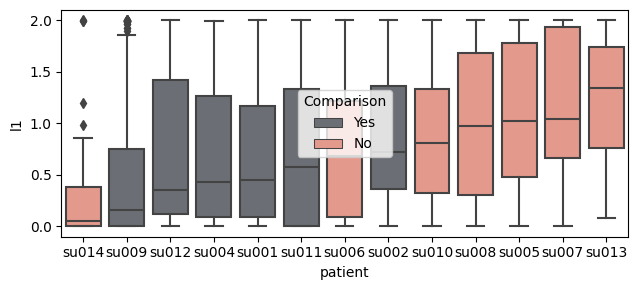

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import tqdm

from tcri.tl import flux as flux_tl
from tcri.pl import tcri_colors


def flux(adata, key, groupby, order, paint_dict=None, method="probabilistic", paint=None, distance_metric="l1", figsize=(12,5), palette=None):
    dfs = []
    if paint != None:
        palette = []
        legend_handles = [] 
        paint_categories = adata.obs[paint].unique()
        if paint_dict != None:
            pcolors = paint_dict
        else:
            pcolors = dict(zip(paint_categories, tcri_colors))
        for category in paint_categories:
            print(category,pcolors[category])
            handle = mpatches.Patch(color=pcolors[category], label=category)
            legend_handles.append(handle)
    else:
        if palette == None:
            if "{}_colors".format(paint) in adata.uns:
                palette = adata.uns["{}_colors".format(paint)]
            else:
                palette = tcri.pl.tcri_colors
    for x in tqdm.tqdm(list(set(adata.obs[groupby]))):
        sdata = adata[adata.obs[groupby]==x]
        hue_order = []
        for i in range(len(order)-1):
            l1_distances = flux_tl(sdata,key=key,from_this=order[i],to_that=order[i+1],distance_metric=distance_metric)
            df = pd.DataFrame(list(l1_distances.items()), columns=['Clone', distance_metric])
            df[groupby] = x
            if paint!=None:
                pcat = sdata.obs[paint].unique().tolist()[0]
                palette.append(pcolors[pcat])
            df["Comparison"] = pcat
            dfs.append(df)
    print(palette)
    df = pd.concat(dfs)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    order = df.groupby(groupby).median(distance_metric).sort_values(distance_metric).index.tolist()
    fig,ax=plt.subplots(1,1,figsize=figsize)
    sns.boxplot(data=df,x=groupby,y=distance_metric,hue="Comparison",palette=pcolors,ax=ax,dodge=False,order=order)
    fig.tight_layout()
    return ax

# # smaller = adata.copy()
# # sc.pp.subsample(smaller, fraction=0.2)
# sdata = adata[adata.obs["clone_size"] > 1]
# flux(sdata, key="treatment", order=["pre","post"], groupby="response_disease", paint_dict=main_color_map, method="probabilistic", distance_metric="l1",paint="response",figsize=(7,5))
# plt.savefig("/Users/ceglian/flux_dkl.pdf")

sdata = adata[adata.obs["clone_size"] > 1]
flux(sdata, key="treatment", order=["pre","post"], groupby="patient", method="probabilistic", distance_metric="l1",paint="response",figsize=(6.5,3))
plt.savefig("/Users/ceglian/l1_response_disease_flux_patient.pdf")

[('Yes', 'No')]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes vs. No: Mann-Whitney-Wilcoxon test two-sided, P_val:2.622e-02 U_stat=4.200e+01


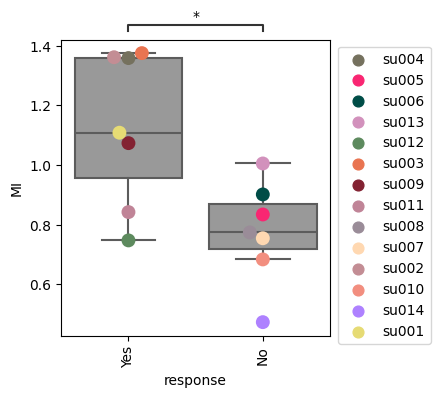

In [87]:
from tcri.pp import clone_size
from tcri.tl import mutual_information as mutual_information_tl
def mutual_information(adata, groupby, splitby=None, method="probabilistic", box_color="#999999", size=10, figsize=(6,5), colors=None, minimum_clone_size=1, rotation=90,return_df=False,bbox_to_anchor=(1.15, 1.15), order=None):
    mis = []
    groups = []
    splits = []
    for group in set(adata.obs[groupby]):
        gdata = adata[adata.obs[groupby] == group]
        clone_size(gdata)
        gdata = gdata[gdata.obs["clone_size"] >= minimum_clone_size]
        if splitby != None:
            for split in set(gdata.obs[splitby]):
                sdata = gdata[gdata.obs[splitby] == split]
                mi = mutual_information_tl(sdata, method=method)
                mis.append(mi)
                groups.append(group)
                splits.append(split)
        else:
            joint_distribution(gdata)
            mi = mutual_information_tl(gdata,method=method)
            mis.append(mi)
            groups.append(group)
    df = pd.DataFrame.from_dict({"MI":mis, groupby: groups})
    if splitby != None:
        df[splitby] = splits
    if order == None:
        order = list(set(adata.obs[splitby]))
    if colors == None:
        colors = tcri_colors
    fig, ax = plt.subplots(1,1,figsize=figsize)
    sns.boxplot(data=df,x=splitby,y="MI",ax=ax,order=order, color=box_color)
    sns.swarmplot(data=df,x=splitby,y="MI",order=order ,s=size, hue=groupby, palette=colors)
    pairs = list(itertools.combinations(set(df[splitby]),2))
    print(pairs)
    annotator = Annotator(ax, pairs=pairs, data=df, x=splitby, y="MI",order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
    fig.tight_layout()
    plt.xticks(rotation=rotation)
    _ = ax.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor)
    if return_df:
        return df
    else:
        return ax
sdata = adata[adata.obs["clone_size"] > 0]
mutual_information(sdata, groupby="patient",splitby="response",figsize=(3.5,4), size=10, bbox_to_anchor=(1.4,1.0),colors=main_color_map)
plt.savefig("/Users/ceglian/yost_mutual_info.pdf")

[('Yes_post', 'No_post'), ('Yes_post', 'Yes_pre'), ('Yes_post', 'No_pre'), ('No_post', 'Yes_pre'), ('No_post', 'No_pre'), ('Yes_pre', 'No_pre')]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yes_pre vs. Yes_post: Mann-Whitney-Wilcoxon test two-sided, P_val:2.086e-01 U_stat=1.400e+01
Yes_post vs. No_pre: Mann-Whitney-Wilcoxon test two-sided, P_val:2.331e-03 U_stat=4.700e+01
No_pre vs. No_post: Mann-Whitney-Wilcoxon test two-sided, P_val:2.086e-01 U_stat=1.400e+01
Yes_post vs. No_post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.649e-01 U_stat=3.600e+01
Yes_pre vs. No_pre: Mann-Whitney-Wilcoxon test two-sided, P_val:3.788e-02 U_stat=4.100e+01
Yes_pre vs. No_post: Mann-Whitney-Wilcoxon test two-sided, P_val:4.557e-01 U_stat=3.100e+01


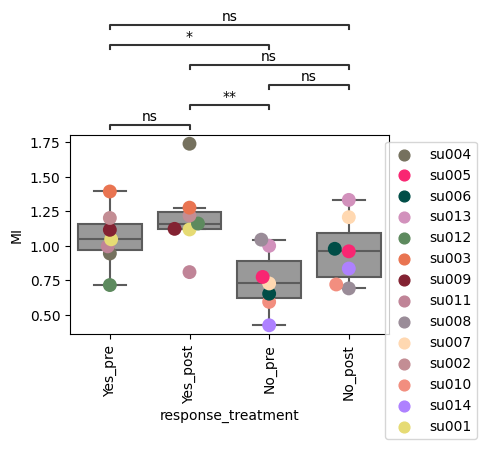

In [142]:
from tcri.pp import clone_size
from tcri.tl import mutual_information as mutual_information_tl
def mutual_information(adata, groupby, splitby=None, method="probabilistic", box_color="#999999", size=10, figsize=(6,5), colors=None, minimum_clone_size=1, rotation=90,return_df=False,bbox_to_anchor=(1.15, 1.15), order=None):
    mis = []
    groups = []
    splits = []
    for group in set(adata.obs[groupby]):
        gdata = adata[adata.obs[groupby] == group]
        clone_size(gdata)
        gdata = gdata[gdata.obs["clone_size"] >= minimum_clone_size]
        if splitby != None:
            for split in set(gdata.obs[splitby]):
                sdata = gdata[gdata.obs[splitby] == split]
                mi = mutual_information_tl(sdata, method=method)
                mis.append(mi)
                groups.append(group)
                splits.append(split)
        else:
            joint_distribution(gdata)
            mi = mutual_information_tl(gdata,method=method)
            mis.append(mi)
            groups.append(group)
    df = pd.DataFrame.from_dict({"MI":mis, groupby: groups})
    if splitby != None:
        df[splitby] = splits
    if order == None:
        order = list(set(adata.obs[splitby]))
    if colors == None:
        colors = tcri_colors
    fig, ax = plt.subplots(1,1,figsize=figsize)
    sns.boxplot(data=df,x=splitby,y="MI",ax=ax,order=order, color=box_color)
    sns.swarmplot(data=df,x=splitby,y="MI",order=order ,s=size, hue=groupby, palette=colors)
    pairs = list(itertools.combinations(set(df[splitby]),2))
    print(pairs)
    annotator = Annotator(ax, pairs=pairs, data=df, x=splitby, y="MI",order=order)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside').apply_and_annotate()
    fig.tight_layout()
    plt.xticks(rotation=rotation)
    _ = ax.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor)
    if return_df:
        return df
    else:
        return ax
sdata = adata[adata.obs["clone_size"] > 0]
mutual_information(sdata, groupby="patient",splitby="response_treatment",figsize=(4,5), size=10, bbox_to_anchor=(1.3,1.0),colors=main_color_map, order=["Yes_pre","Yes_post","No_pre","No_post"])
plt.savefig("/Users/ceglian/yost_mutual_info_tp.pdf")

In [283]:
ct = []
for x,y in zip(adata.obs["patient"],adata.obs["treatment"]):
    ct.append("{}_{}".format(x,y))
adata.obs["patient_treatment"] = ct

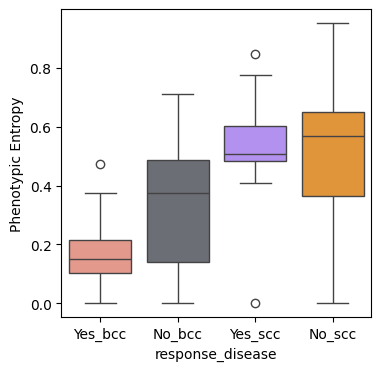

In [305]:
sdata = adata[adata.obs["clone_size"] > 50]
tcri.pl.phenotypic_entropy(sdata,groupby="patient_treatment",splitby="response_disease",order=["Yes_bcc","No_bcc","Yes_scc","No_scc"], figsize=(4,4))
plt.savefig("/Users/ceglian/pent.pdf")

hit


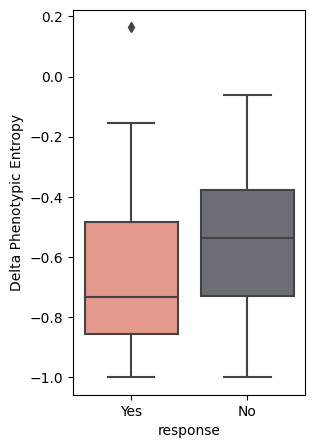

In [95]:
# groupby = "patient"
# ps = []
# rs = []
# r2 = []
# ts = []
# for r in set(adata.obs["response"]):
#     rdata = adata[adata.obs["response"] == r]
#     for p in set(rdata.obs[groupby]):
#         pdata = rdata[rdata.obs[groupby] == p]
#         for tp in set(pdata.obs["treatment"]):
#             tdata = pdata[pdata.obs["treatment"] == tp]
#             ps.append(p)
#             rs.append(r)
#             ts.append(tp)
#             r2.append(tcri.tl.phenotypic_entropies(tdata).va)
# df = pd.DataFrame.from_dict({"Patient":ps,"Response":rs,"Coefficient":r2,"Timepoint":ts})
# fig, ax = plt.subplots(1,1,figsize=(5,4))
# sns.boxplot(data=df, x="Response",y="Coefficient", hue="Timepoint",ax=ax, hue_order=["pre","post"],palette="Dark2")
# #sns.stripplot(data=df, x="Response",y="Coefficient", hue="Timepoint",ax=ax, hue_order=["pre","post"],palette="Dark2")
# #fig.savefig("/Users/ceglian/tp_pentropy.pdf")
sdata = adata[adata.obs["clone_size"] > 50]
tcri.pp.joint_distribution(sdata)
tcri.pl.phenotypic_entropy_delta(sdata,groupby="response",key="treatment",from_this="pre",to_that="post",figsize=(3,5))
plt.savefig("/Users/ceglian/flux_delta.pdf")

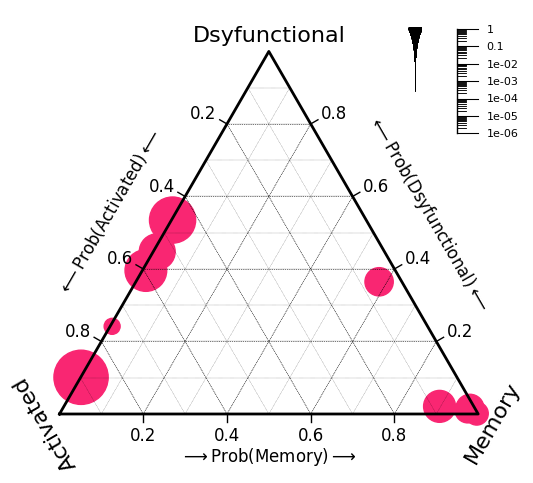

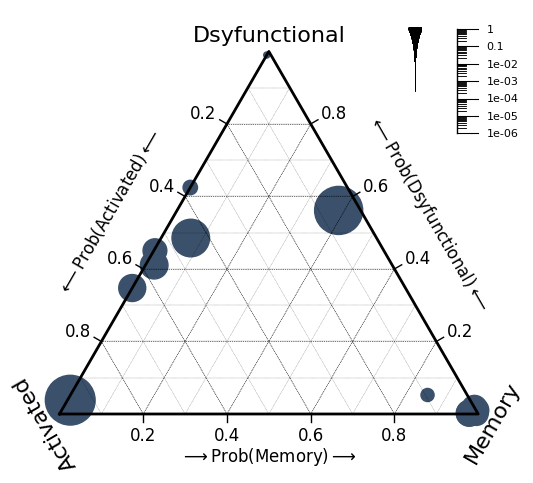

In [201]:
def freq_to_size_scaling(freq):
    return 80*(freq**(1/2))

# ddata = adata[adata.obs['disease'] == "bcc"]
responder = adata[adata.obs["response"] == "Yes"]
responder = responder[responder.obs["treatment"] == "pre"]
responder = responder[responder.obs["clone_size"] > 50]
tcri.pp.joint_distribution(responder)

tcri.pl.probability_ternary(responder,["Dsyfunctional","Activated","Memory"],splitby="treatment",conditions=["pre"],scale_function=lambda x: freq_to_size_scaling(x),color=tcri.pl.tcri_colors[10])
plt.savefig("/Users/ceglian/resp_bcc_tern.pdf")

responder = adata[adata.obs["response"] == "Yes"]
responder = responder[responder.obs["treatment"] == "post"]
responder = responder[responder.obs["clone_size"] > 50]
tcri.pp.joint_distribution(responder)

tcri.pl.probability_ternary(responder,["Dsyfunctional","Activated","Memory"],splitby="treatment",conditions=["post"],scale_function=lambda x: freq_to_size_scaling(x),color=tcri.pl.tcri_colors[15])
plt.savefig("/Users/ceglian/resp_bcc_tern.pdf")

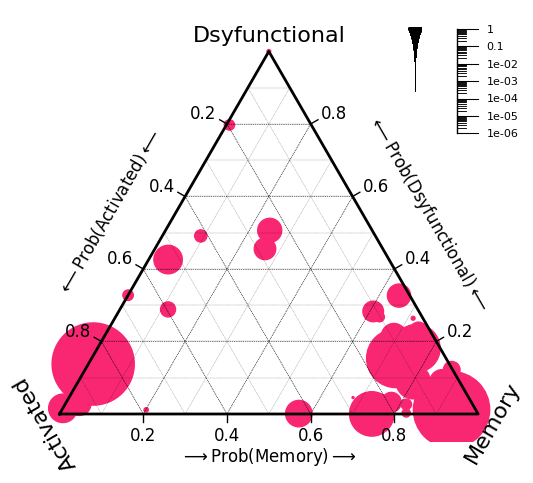

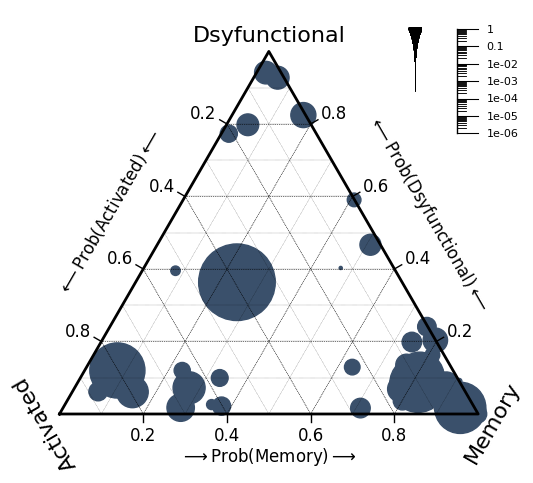

In [200]:
def freq_to_size_scaling(freq):
    return 140*(freq**(1/2))

# ddata = adata[adata.obs['disease'] == "bcc"]
responder = adata[adata.obs["response"] == "No"]
responder = responder[responder.obs["treatment"] == "pre"]
responder = responder[responder.obs["clone_size"] > 30]
tcri.pp.joint_distribution(responder)

tcri.pl.probability_ternary(responder,["Dsyfunctional","Activated","Memory"],splitby="treatment",conditions=["pre"],scale_function=lambda x: freq_to_size_scaling(x),color=tcri.pl.tcri_colors[10])
plt.savefig("/Users/ceglian/resp_bcc_tern.pdf")

responder = adata[adata.obs["response"] == "No"]
responder = responder[responder.obs["treatment"] == "post"]
responder = responder[responder.obs["clone_size"] > 30]
tcri.pp.joint_distribution(responder)

tcri.pl.probability_ternary(responder,["Dsyfunctional","Activated","Memory"],splitby="treatment",conditions=["post"],scale_function=lambda x: freq_to_size_scaling(x),color=tcri.pl.tcri_colors[15])
plt.savefig("/Users/ceglian/resp_bcc_tern.pdf")

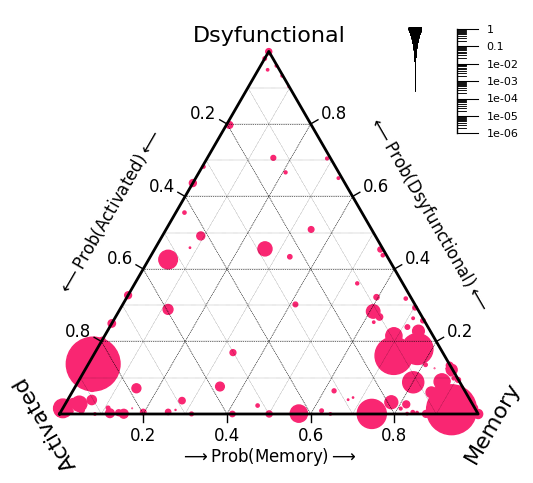

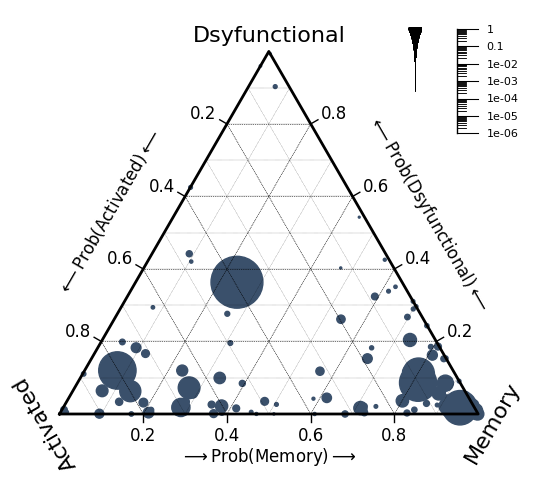

In [196]:
def freq_to_size_scaling(freq):
    return 100*(freq**(1/2))

ddata = adata[adata.obs['disease'] == "scc"]
responder = ddata[ddata.obs["response"] == "No"]
responder = responder[responder.obs["treatment"] == "pre"]
responder = responder[responder.obs["clone_size"] > 5]
tcri.pp.joint_distribution(responder)

tcri.pl.probability_ternary(responder,["Dsyfunctional","Activated","Memory"],splitby="treatment",conditions=["pre"],scale_function=lambda x: freq_to_size_scaling(x),color=tcri.pl.tcri_colors[10])
plt.savefig("/Users/ceglian/resp_bcc_tern.pdf")

ddata = adata[adata.obs['disease'] == "scc"]
responder = ddata[ddata.obs["response"] == "No"]
responder = responder[responder.obs["treatment"] == "post"]
responder = responder[responder.obs["clone_size"] > 5]
tcri.pp.joint_distribution(responder)

tcri.pl.probability_ternary(responder,["Dsyfunctional","Activated","Memory"],splitby="treatment",conditions=["post"],scale_function=lambda x: freq_to_size_scaling(x),color=tcri.pl.tcri_colors[15])
plt.savefig("/Users/ceglian/resp_bcc_tern.pdf")

Activated        0.77650
Dsyfunctional    0.76700
Memory           0.23080
Naive            0.46196
dtype: float64
Activated        0.783920
Dsyfunctional    0.638825
Memory           0.466515
Naive            0.567385
dtype: float64
Activated        0.75492
Dsyfunctional    0.10232
Memory           0.63931
Naive            0.57493
dtype: float64
Activated        0.04142
Dsyfunctional    0.20281
Memory           0.79101
Naive            0.88737
dtype: float64
Activated        0.547330
Dsyfunctional    0.257545
Memory           0.636165
Naive            0.605000
dtype: float64
Activated        0.672025
Dsyfunctional    0.708795
Memory           0.638325
Naive            0.709360
dtype: float64
Activated        0.031995
Dsyfunctional    0.195635
Memory           0.724995
Naive            0.951940
dtype: float64
Activated        0.81673
Dsyfunctional    0.84593
Memory           0.20213
Naive            0.39805
dtype: float64


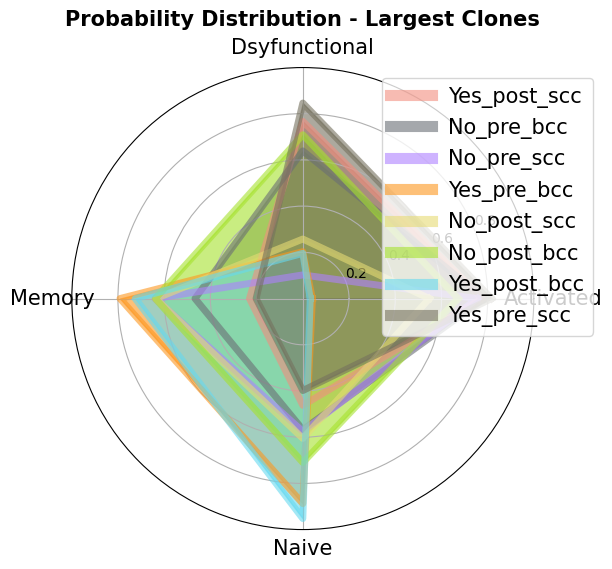

In [208]:
def polar_plot(adata, phenotypes=None, statistic="entropy", method="probabilistic", save=None, figsize=(6,6), title=None, alpha=0.6, fontsize=15, splitby=None, bbox_to_anchor=(1.15,1.), linewidth=5., legend_fontsize=15, color_dict=None):
    tcri.pp.joint_distribution(adata,method=method )
    plt.figure(figsize=figsize)
    ax = plt.subplot(111, projection='polar')
    if splitby is None:
        splits = ['All']
    else:
        splits = list(set(adata.obs[splitby]))
    if phenotypes is None:
        phenotypes = adata.uns["joint_distribution"].index
    N = len(phenotypes)
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
    plot_theta = np.append(theta, theta[0])
    adata = adata[adata.obs[adata.uns["tcri_phenotype_key"]].isin(phenotypes)]
    for i, split in enumerate(splits): 
        if color_dict == None:
            colorx = tcri.pl.tcri_colors[i]
        else:
            colorx = color_dict[split]
        psubset = adata[adata.obs[splitby] == split]
        pdists = []
        for p in set(psubset.obs["patient"]):
            ppsubset = psubset[psubset.obs["patient"] == p]
            if len(ppsubset.obs.index) < 10: continue
            tcri.pp.joint_distribution(ppsubset)
            if statistic == "entropy":
                pdist = pd.Series(tcri.tl.clonotypic_entropies(ppsubset,normalized=True))
                phenotypes = pdist.index.tolist()
                pdists.append(pdist)
            else:    
                pdist = pdistribution(psubset, method=method)
            pdists.append(pdist)
        pdist = pd.DataFrame(pdists).T
        pdist = pdist.median(axis=1)
        print(pdist)
        pdist = pdist.tolist()
        pdist.append(pdist[0])
        ax.plot(plot_theta, pdist, color=colorx, alpha=alpha, label=split, linewidth=linewidth)
        ax.fill_between(plot_theta, 0, pdist, color=colorx, alpha=alpha)
    ax.set_xticks(theta)
    ax.set_xticklabels(phenotypes, fontsize=fontsize)
    ax.grid(True)
    leg = ax.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor, fontsize=legend_fontsize)
    for line in leg.get_lines():
        line.set_linewidth(8.0)  # Set the line width
    if title:
        plt.title(title, va='bottom', fontsize=fontsize, fontweight="bold")
    if save:
        plt.savefig(save)
    
sub = adata[adata.obs["clone_size"] > 50]

polar_plot(sub,splitby="rdt",statistic="entropy", title="Probability Distribution - Largest Clones",save="/Users/ceglian/Data/tcri/pdist_polar.pdf")

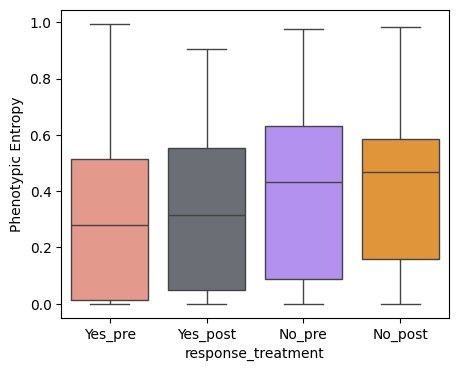

In [181]:
ct = []
for x in set(adata.obs["patient"]):
    sdata=adata[adata.obs['patient'] == x]
    df = sdata.obs[["trb","clone_size"]].sort_values("clone_size", ascending=False)["trb"].unique().tolist()[:50]
    ct += df

sdata= adata[adata.obs['trb'].isin(ct)]
print()
tcri.pl.phenotypic_entropy(sdata,groupby="patient", splitby='response_treatment', figsize=(5,4), normalized=True, order=["Yes_pre","Yes_post","No_pre","No_post"], save="/Users/ceglian/Data/tcri/yost_phenotypic_entropy.pdf")

In [186]:
def phenotypic_entropy_delta_tl(adata, groupby, key, from_this, to_that):
    clone = []
    entropy = []
    diffs = []
    timepoint = []
    resp = []
    for x in set(adata.obs[groupby]):
        response = adata[adata.obs[groupby] == x]
        predata = response[response.obs[key] == from_this]
        joint_distribution(predata)
        postdata = response[response.obs[key] == to_that]
        joint_distribution(postdata)
        preents = tcri.tl.phenotypic_entropies(predata,normalized=True)
        postents = tcri.tl.phenotypic_entropies(postdata,normalized=True)
        common_tcr = set(preents.keys()).intersection(postents.keys())
        for c in common_tcr:
            diff = postents[c] - preents[c] / (preents[c] +0.00000000000001)
            resp.append(x)
            entropy.append(diff)
            clone.append(c)
    df = pd.DataFrame.from_dict({"Clone":clone,groupby:resp, "Delta Phenotypic Entropy":entropy})
    return df

def phenotypic_entropy_delta(adata, groupby, key, from_this, to_that, palette=None, figsize=(7,5), save=None):
    df = phenotypic_entropy_delta_tl(adata, groupby, key, from_this, to_that)
    if palette==None:
        print("hit")
        palette=tcri_colors
    fig, ax = plt.subplots(1,1,figsize=figsize)
    sns.boxplot(data=df, y='Delta Phenotypic Entropy', x=groupby, palette=palette,ax=ax)
    if save != None:
        fig.savefig(save)

In [3]:
# sdata = adata[adata.obs["clone_size"] > 10]
# tcri.pp.joint_distribution(sdata)
# phenotypic_entropy_delta(sdata,groupby='response_disease', key="treatment", from_this="pre", to_that="post", palette=main_color_map, save="/Users/ceglian/Data/tcri/pent_delta.pdf")

In [203]:
adata.write("yost_save.h5ad")